In [17]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


1. Problem 6.2 of your textbook.
2. Problem 6.10 of your textbook.
3. Show that s
TLs =
Pn
j=1
Pn
i=1 si
lij sj . Here L is graph Laplacian and s is
a column vector. This appeared in lectures. See also equations 6.36 and 6.37 of your textbook.

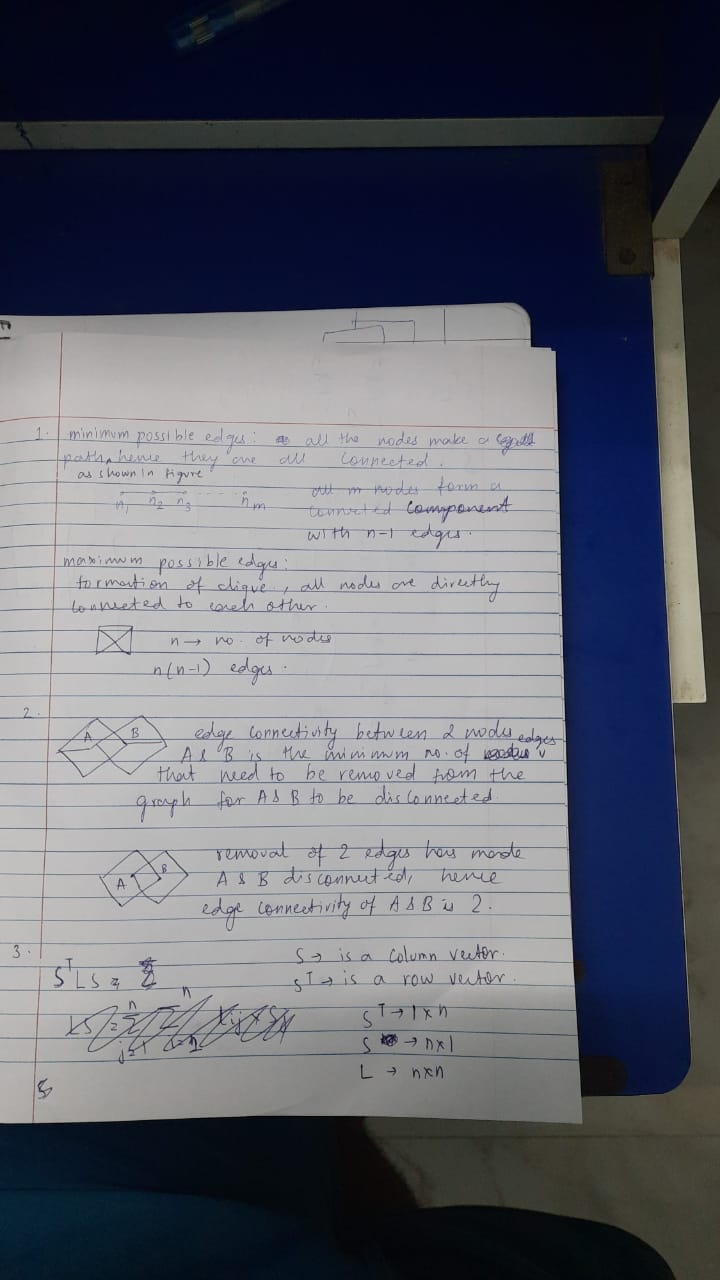

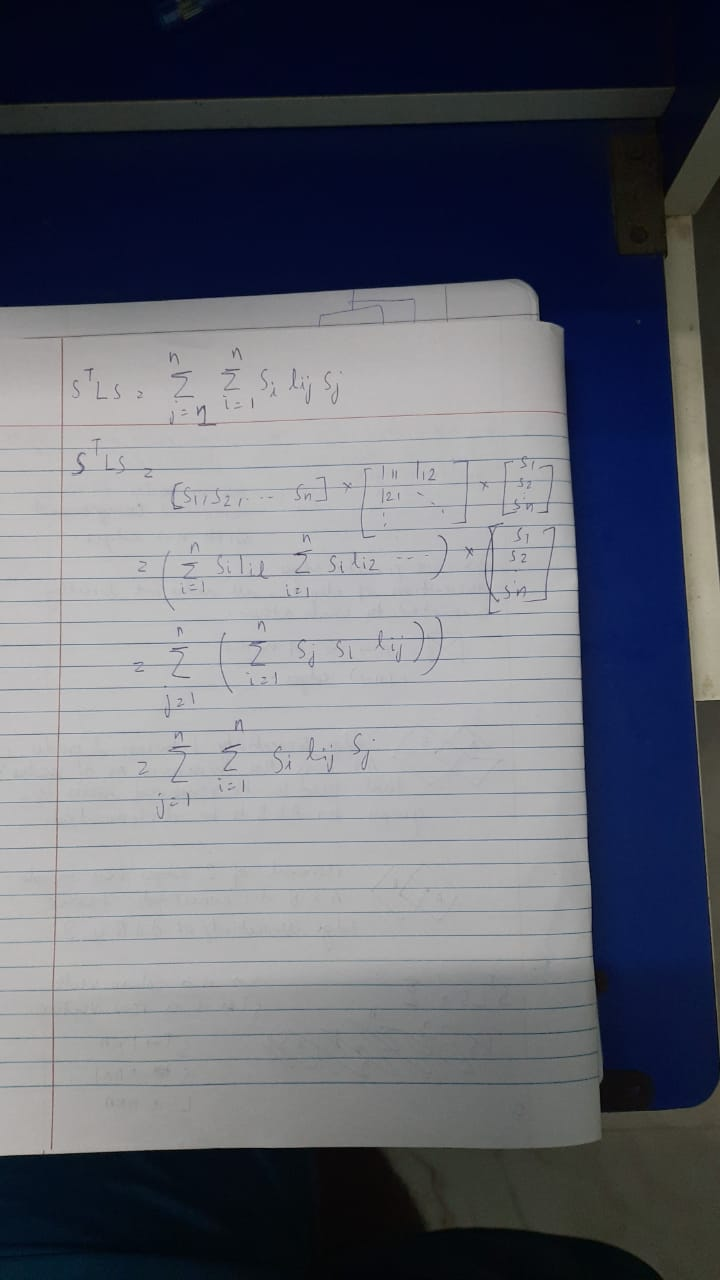

4. Write a program to determine whether a network is directed or not, if it
is directed, determine whether it is cyclic or not. Provide the code, and
explain all parts of your code in plain English. Demonstrate the output
for a few different networks (you may hand craft small networks) – draw
the network by hand then show that your program correctly identifies the
nature of the network (directed/undirected, cyclic/acyclic).

In [18]:
def draw_graph_from_adjacency_matrix(a):
  G = nx.DiGraph() 
  rows,columns=len(a),len(a[0])
  for i in range(rows): 
    for j in range( columns): 
      if a[i][j] == 1: 
        G.add_edge(i,j) 
  nx.draw( G ) 
  plt.show() 

In [19]:
def directed_or_undirected(Adj_matrix): # A symmetric adjacency matrix denotes an undirected graph and a asymmetric function would denote a symmetric matrix.
  row,col=len(Adj_matrix),len(Adj_matrix[0])
  for i in range((row//2)+1):
    for j in range((col//2)+1):
      if Adj_matrix[i][j]!=Adj_matrix[j][i]:
        return("Directed graph")
  return("Undirected graph")

In [20]:
def detect_cycles(A):                 # makes of the trace(A^n) of adjacency matrix is not equal to zero then there is a cycle. multiplying 
  for n in range(1,len(A[0])):        # the adjacency matrix with itself is like traversing across the matrix , after n iterations if the trace is not zero then no cycle is present.
    if np.trace(np.power(A,n+1))!=0:  
      return('Graph contain cycle')

  return("Cycles not found")

In [21]:
a1=[[1,1],[1,1]]
a2=[[1,0],[1,0]]

In [22]:
directed_or_undirected(a1)

'Undirected graph'

In [23]:
directed_or_undirected(a2)

'Directed graph'

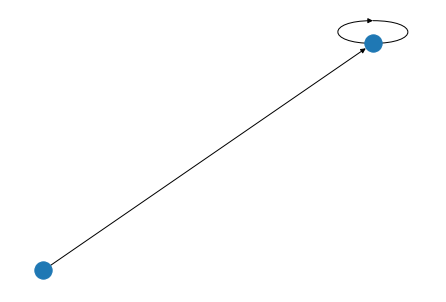

In [24]:
draw_graph_from_adjacency_matrix(a2)

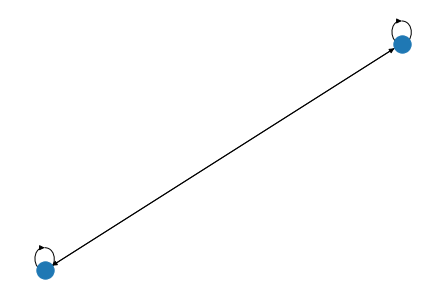

In [25]:
draw_graph_from_adjacency_matrix(a1)

In [26]:
detect_cycles(a2) # checks for cycle presence.

'Graph contain cycle'

In [27]:
directed_or_undirected([[0,1,1],[0,0,1],[0,1,0]])

'Directed graph'

In [28]:
detect_cycles([[0,1,1],[0,0,1],[0,1,0]]) # no cycle found , network found below.

'Cycles not found'

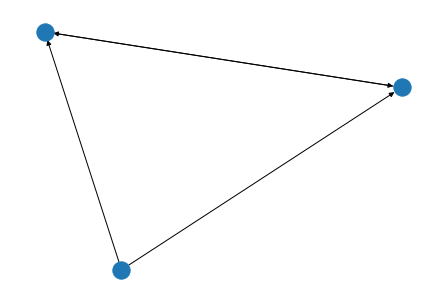

In [29]:
draw_graph_from_adjacency_matrix([[0,1,1],[0,0,1],[0,1,0]])

5. Write a program to find of number of components in an undirected net-
work. Provide the code, and explain all parts of your code in plain English.

Demonstrate the output for a few different networks (you may hand craft
small networks) – draw the network by hand then show that your program
correctly calculates the number of components in the networks.

In [43]:
def DFS(a, temp, v, visited):   # we perform DFS search and see if under one node all other node can be accessed , if not a new component is initiated and search
        visited[v] = True       # is done for that , components are then separated.
        temp.append(v)
        for i in range(len(a)):
            if a[v][i]!=0 and visited[i] == False:
                temp = DFS(a,temp, i, visited)
        return temp

In [44]:
def no_of_components(a):
  cc=[] ## connected components
  visited=[False for i in range(len(a))] # visited matrix , set false at beginning
  for v in range(len(a)): # traverse node by node , if a node has a ajacent node , the adjacent nodes are called based on Depth wise.
    if visited[v] == False:
      temp = []
      cc.append(DFS(a,temp, v, visited))
  return cc

In [49]:
A=[[0,0,0,0,1],[0,1,1,0,0],[0,1,1,1,0],[0,0,0,1,0],[1,0,0,0,0]]

In [50]:
no_of_components(A) # splits each connected component separately.

[[0, 4], [1, 2, 3]]

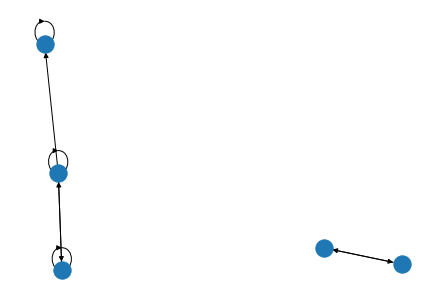

In [51]:
draw_graph_from_adjacency_matrix(A)  # 2 connected components